In [1]:
%cd /content/drive/MyDrive/Machine Learning/Lab08

[Errno 2] No such file or directory: '/content/drive/MyDrive/Machine Learning/Lab08'
/content


In [ ]:
# Step 1.1: Load the library
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.datasets import mnist # MNIST dataset is included in Keras
import numpy as np


# Step 1.2: Load the dataset
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# Step 1.3: Scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train scaled", X_train_scaled.shape)
print("X_test scaled", X_test_scaled.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)
X_train scaled (60000, 784)
X_test scaled (10000, 784)


In [ ]:
# Step 2.1: fit the model on the scaled data (X_train_scaled)
# Note: 1~2 minutes to run on this data to get the mean of optimal clusters (centroid).
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10)
kmeans_model.fit(X_train_scaled)
 

# Step 2.2: After the clustering is done, we can predict the cluster labels.
# This will returns a cluster label for each sample, indicating to which cluster a sample belongs. 
# Note: this is the class label, not image label
train_cluster_labels = kmeans_model.predict(X_train_scaled)
print("train_cluster_labels: ", train_cluster_labels)
# Step 2.3: We can also use the model to predict cluster labels for any new test data.
# The new data points will be assigned to clusters whose centroid is closest.

X_test_scaled= scaler.transform(X_test)
test_cluster_labels = kmeans_model.predict(X_test_scaled)
print("test_cluster_labels: ", test_cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


train_cluster_labels:  [1 4 2 ... 1 8 8]
test_cluster_labels:  [7 8 3 ... 7 8 6]


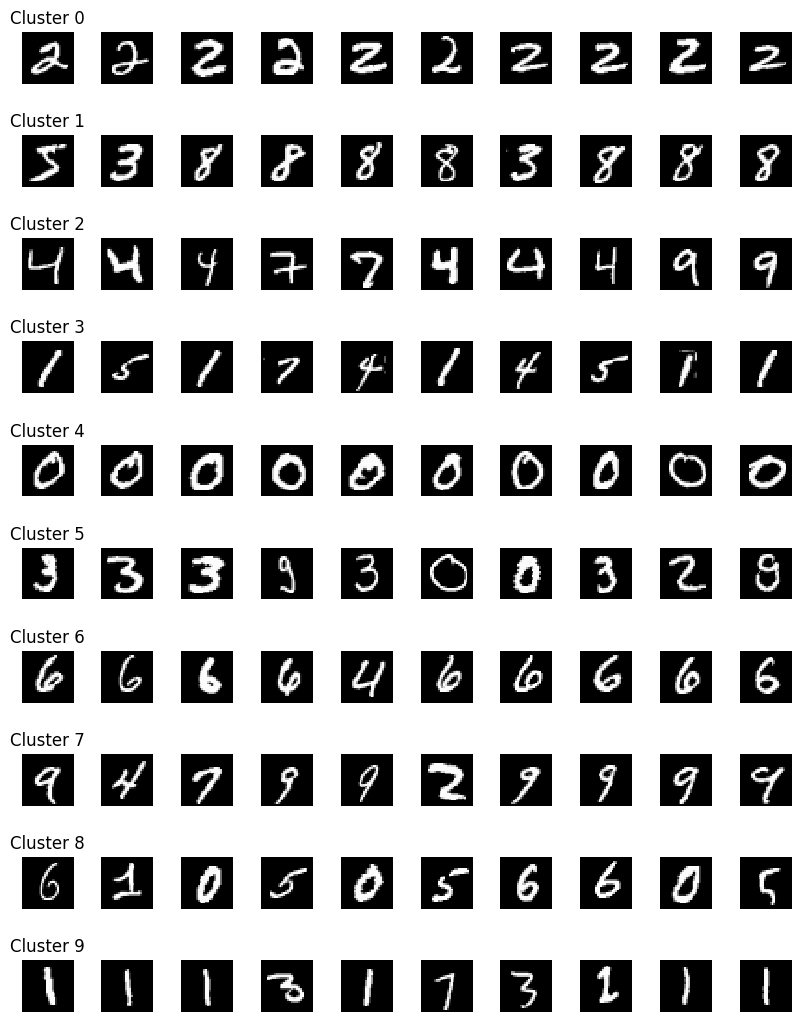

In [ ]:
# Step 3: visualize the images in each cluster from K-means
img_idx = 0
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
for cluster_id in set(train_cluster_labels):
    cluster_images = X_train_scaled[train_cluster_labels==cluster_id] ## get images within same clusters

    #select first 10 for visualization

    for i in range(10):
        plt.subplot(10,10,img_idx+1)
        plt.imshow(cluster_images[i].reshape(28,28), cmap='gray', interpolation='none')
        plt.axis('off')
        if i == 0: plt.title("Cluster {}".format(cluster_id))
        img_idx += 1

In [ ]:
# Step 4.1 Evaluate the clustering accuracy on the training data (Assume the true labels are known)
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':train_cluster_labels, 'true_labels': y_train })
print(evaluation_df)
contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table

       cluster_labels  true_labels
0                   1            5
1                   4            0
2                   2            4
3                   3            1
4                   7            9
...               ...          ...
59995               1            8
59996               1            3
59997               1            5
59998               8            6
59999               8            8

[60000 rows x 2 columns]


true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,7,9,4156,174,29,5,52,40,44,16
1,73,8,170,958,14,1014,15,15,3502,68
2,45,6,191,175,3190,372,55,1805,177,2916
3,2,3042,331,52,212,246,41,260,283,88
4,4304,0,44,22,7,54,52,20,30,41
5,230,6,276,3859,0,1807,34,5,1049,83
6,147,5,131,29,141,61,3764,4,42,9
7,5,10,68,35,1882,169,3,3769,167,2448
8,1108,6,210,418,212,1541,1718,10,242,25


In [ ]:
# Step 4.1 Evaluate the clustering accuracy on the test data (Assume the true labels are known)
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':test_cluster_labels, 'true_labels': y_test })
print(evaluation_df)
contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table

      cluster_labels  true_labels
0                  7            7
1                  8            2
2                  3            1
3                  4            0
4                  2            4
...              ...          ...
9995               0            2
9996               5            3
9997               7            4
9998               8            5
9999               6            6

[10000 rows x 2 columns]


true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,2,1,704,31,1,2,11,13,8,3
1,8,1,34,141,2,174,1,3,598,17
2,3,0,31,14,557,59,13,294,29,544
3,2,482,85,2,23,31,3,51,28,6
4,724,0,11,1,1,6,17,1,6,6
5,50,2,48,687,0,309,2,1,191,7
6,33,2,22,4,22,12,667,0,12,5
7,2,0,11,8,299,43,1,603,30,385
8,156,1,24,56,46,233,223,2,37,5


In [ ]:
# Step 6.1: Load the library
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.datasets import mnist # MNIST dataset is included in Keras
from keras.utils import np_utils
import numpy as np


# Step 6.2: Load the MNIST dataset
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
# Step 6.3: Scale the MNIST data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Step 6.4: Generate one-hot encoding for labels
nb_classes = 10
y_train_categorical = np_utils.to_categorical(y_train, nb_classes)
y_test_categorical = np_utils.to_categorical(y_test, nb_classes)
# Step 6.5: Create one neural network using Keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(128))
model.add(Activation('relu')) # Hidden layer output
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

print("X_train shape_scaled", X_train_scaled.shape)
print("X_test shape_scaled", X_test_scaled.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)   

In [ ]:
#step 7.1: training the network
history = model.fit(X_train_scaled, y_train_categorical, validation_split = 0.1, batch_size=128, epochs=10, verbose=1)

# Step 7.2: Evaluate on the test set
score = model.evaluate(X_test_scaled, y_test_categorical)
print('Test score:', score)

#training accuracy and training validation
print("Training accuracy:", history.history['accuracy'])
print("Validation accuracy:", history.history['val_accuracy'])


Epoch 1/10
422/422 [==============================] - 4s 9ms/step - loss: 0.2768 - accuracy: 0.9186 - val_loss: 0.1012 - val_accuracy: 0.9737
Epoch 2/10
422/422 [==============================] - 4s 10ms/step - loss: 0.1069 - accuracy: 0.9664 - val_loss: 0.0773 - val_accuracy: 0.9768
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0736 - accuracy: 0.9767 - val_loss: 0.0815 - val_accuracy: 0.9757
Epoch 4/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0552 - accuracy: 0.9822 - val_loss: 0.0736 - val_accuracy: 0.9795
Epoch 5/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0656 - val_accuracy: 0.9797
Epoch 6/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0652 - val_accuracy: 0.9820
Epoch 7/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0327 - accuracy: 0.9886 - val_loss: 0.0617 - val_accuracy: 0.9828
Epoc

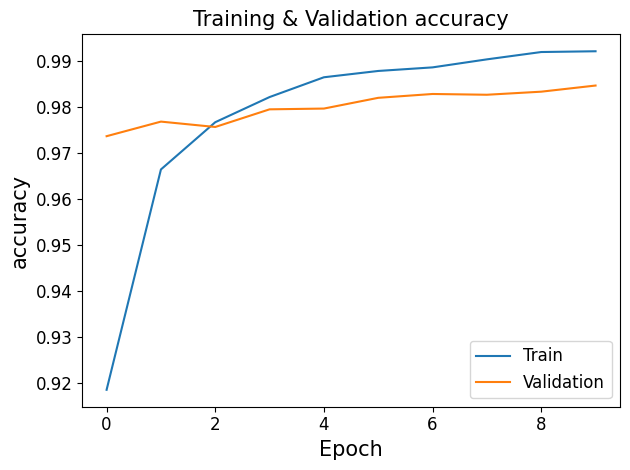

In [ ]:
#Visualize the learning curves
# Step 19.2: Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
### Step 8a: get all layers of the model and save into a list 
model_layers = model.layers
print("model_layers:", model_layers)
###Step 8b: Let's select last second layer as the output for feature extractor 
# model.layers[-3].output corresponds to the output of last second layer 
print("model.layers[-3].output:", model.layers[-3].output)
###Step 8c: select the first layer as the input of feature extractor 
# model.layers[0].input corresponds to the input of the first layer 
print("model.layers[0].input: ", model.layers[0].input)
###Step 8d: Then we can build a feature extractor function to map the input to feature vectors
from keras import backend as K
Get_Hidden_Layered_Output = K.function([model.layers[0].input], [model.layers[-3].output])

###  Let's apply the feature extractor on one image, and check the feature vector
X_test_featureVector = Get_Hidden_Layered_Output([X_test_scaled])[0]

print("extracted_features:", X_test_featureVector)
print("shape of original features:", X_test_scaled.shape)
print("shape of extracted features:", X_test_featureVector.shape)

model_layers: [<keras.layers.core.dense.Dense object at 0x7f26591698d0>, <keras.layers.core.activation.Activation object at 0x7f26591bfe80>, <keras.layers.regularization.dropout.Dropout object at 0x7f2672539240>, <keras.layers.core.dense.Dense object at 0x7f2672538d60>, <keras.layers.core.activation.Activation object at 0x7f26591bfee0>, <keras.layers.core.dense.Dense object at 0x7f2672538f40>, <keras.layers.core.activation.Activation object at 0x7f267253b160>]
model.layers[-3].output: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='activation_1/Relu:0', description="created by layer 'activation_1'")
model.layers[0].input:  KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
extracted_features: [[4.351496   0.         0.         ... 0.         0.49121583 0.        ]
 [0.         0.         0.9584248  ... 4.6049924  3.8864784  1.3049614 ]
 [0.35

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


test_cluster_labels:  [7 8 3 ... 7 8 6]


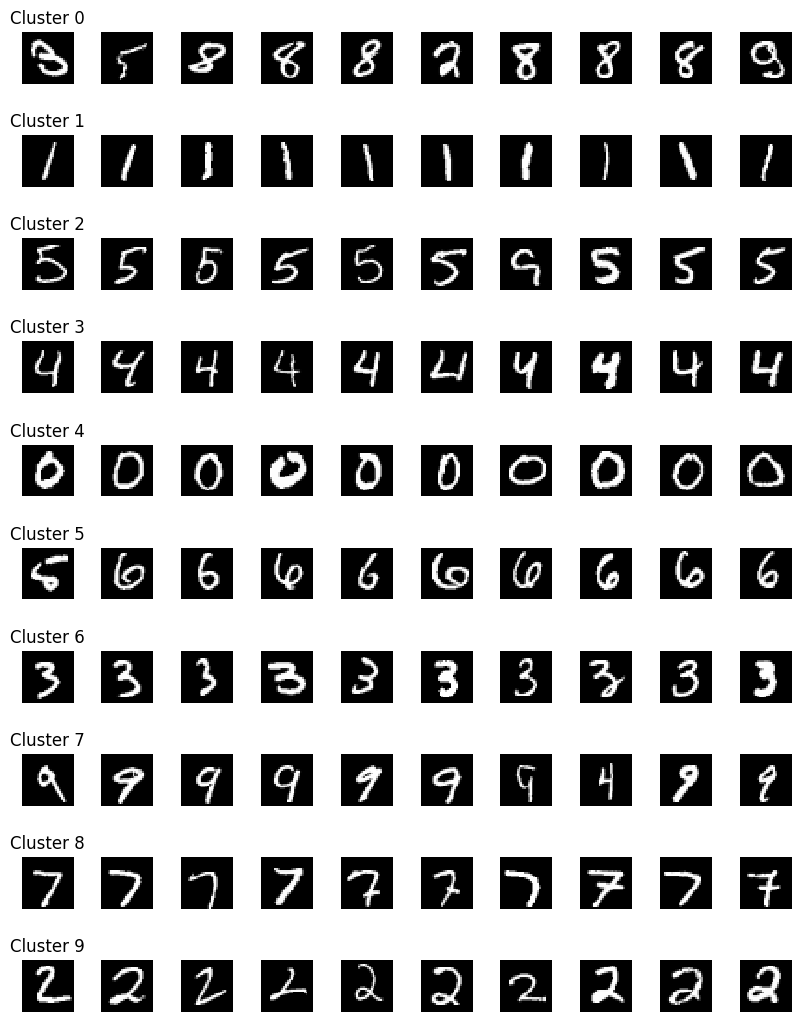

In [ ]:
# Step 9.1 Apply the clustering algorithms on the hidden features of the images
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10)
kmeans_model.fit(X_test_featureVector)


# Step 9.2. After the clustering is done, we can predict the cluster labels.
# This will returns a cluster label for each sample, indicating to which cluster a sample belongs. 
# Note: this is the class label, not the image label
pred_cluster_labels = kmeans_model.predict(X_test_featureVector)
print("test_cluster_labels: ", test_cluster_labels)

# Step 9.3  Get clustering labels and visualize the clusters
img_idx = 0
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
for cluster_id in set(pred_cluster_labels):
    cluster_images = X_test_scaled[pred_cluster_labels==cluster_id]
    #select first 10 for visualization
    for i in range(10):
        plt.subplot(10,10,img_idx+1)
        plt.imshow(cluster_images[i].reshape(28,28), cmap='gray', interpolation='none')
        plt.axis('off')

        if i == 0: plt.title("Cluster {}".format(cluster_id))
        img_idx += 1

In [ ]:
# Step 10. Evaluate the clustering accuracy (Assume the true labels are known)
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':pred_cluster_labels, 'true_labels': y_test })
print(evaluation_df)

contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table

      cluster_labels  true_labels
0                  8            7
1                  9            2
2                  1            1
3                  4            0
4                  3            4
...              ...          ...
9995               9            2
9996               6            3
9997               3            4
9998               2            5
9999               5            6

[10000 rows x 2 columns]


true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,14,7,52,51,4,72,14,13,966,16
1,0,1123,0,0,6,0,2,8,0,2
2,0,0,0,4,0,800,2,0,1,3
3,0,0,3,0,917,0,1,5,0,1
4,962,0,4,0,0,1,4,3,0,2
5,3,1,3,0,6,10,935,0,1,1
6,0,1,0,934,0,4,0,0,0,6
7,0,0,2,4,49,5,0,34,4,978
8,1,0,7,7,0,0,0,955,1,0


In [ ]:
# Step 11a: Try different number of clusters, and evaluate the clusters using silhouette
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

elbow={"inertia":[],"clusters":[]}
silhouette={"silhouette":[],"clusters":[]}

for i in range(3,15): 
   print("Clustering data into ", i, ' groups')
   kmeans_model=KMeans(i) 
   elbow["clusters"].append(i) 
   kmeans_model.fit(X_test_featureVector) # use test set for practice in this lab.
   elbow["inertia"].append(kmeans_model.inertia_)
   silhouette["silhouette"].append(silhouette_score(X_test_featureVector,kmeans_model.labels_))

Clustering data into  3  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  4  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  5  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  6  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  7  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  8  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  9  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  10  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  11  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  12  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  13  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  14  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


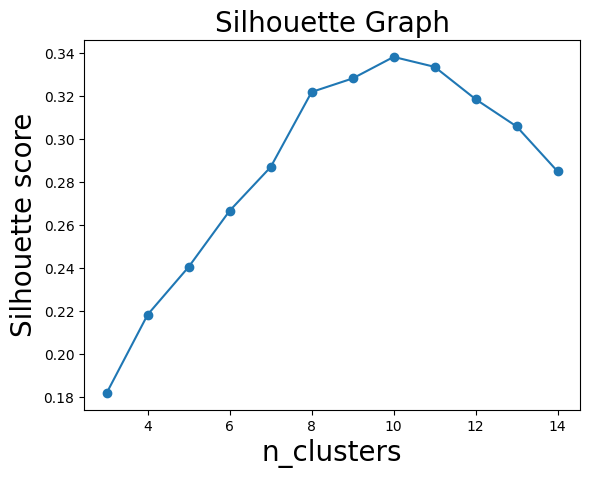

In [ ]:
# Step 12b:  Visualize the optimal clusters based on Silhouette
plt.scatter(x=elbow["clusters"],y=silhouette["silhouette"]) 
plt.plot(elbow["clusters"], silhouette["silhouette"])
plt.xlabel("n_clusters", size=20) 
plt.ylabel("Silhouette score", size=20) 
plt.title("Silhouette Graph", size=20)
plt.show()

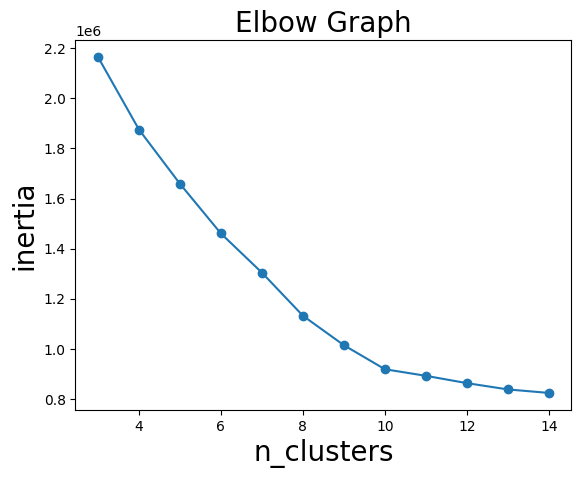

In [ ]:
# Step 12c:  Visualize the optimal clusters based on Inertia
plt.scatter(x=elbow["clusters"],y=elbow["inertia"]) 
plt.plot(elbow["clusters"], elbow["inertia"])
plt.xlabel("n_clusters", size=20) 
plt.ylabel("inertia", size=20) 
plt.title("Elbow Graph", size=20)
plt.show()

In [ ]:
## step 13.1 Sample a small dataset from the test set
import numpy as np
rand_id = np.random.choice(range(len(X_test_featureVector)), size=40) # sample 40 images
sub_sample_images = X_test[rand_id]
sub_sample_featureVector = X_test_featureVector[rand_id] # use extracted features for better clustering 
sub_sample_labels = y_test[rand_id]

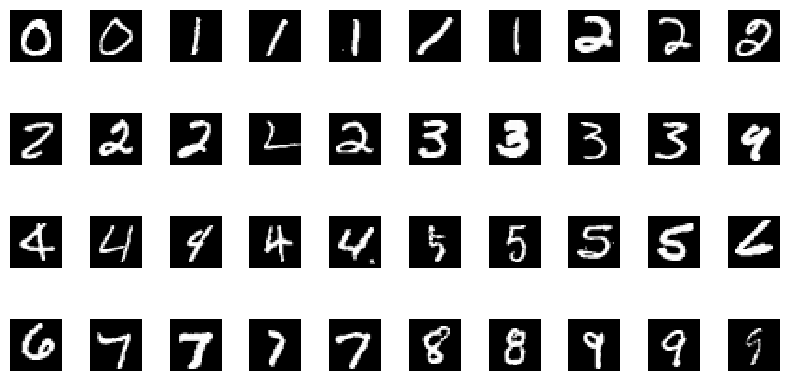

In [ ]:
# Step 13.2: visualize the images in the sampled data set
img_idx = 0
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)

for digit_id in set(sub_sample_labels):
   digit_images = sub_sample_images[sub_sample_labels==digit_id] ## get images within same clusters
   for i in range(len(digit_images)):
      plt.subplot(10,10,img_idx+1)
      plt.imshow(digit_images[i].reshape(28,28), cmap='gray', interpolation='none')
      plt.axis('off')
      img_idx += 1

In [ ]:
# Step 13.3: normalize by each sample before applying hierarchical clustering
from scipy import stats
data_featureVector_scaled = stats.zscore(sub_sample_featureVector, axis=1, ddof=1)

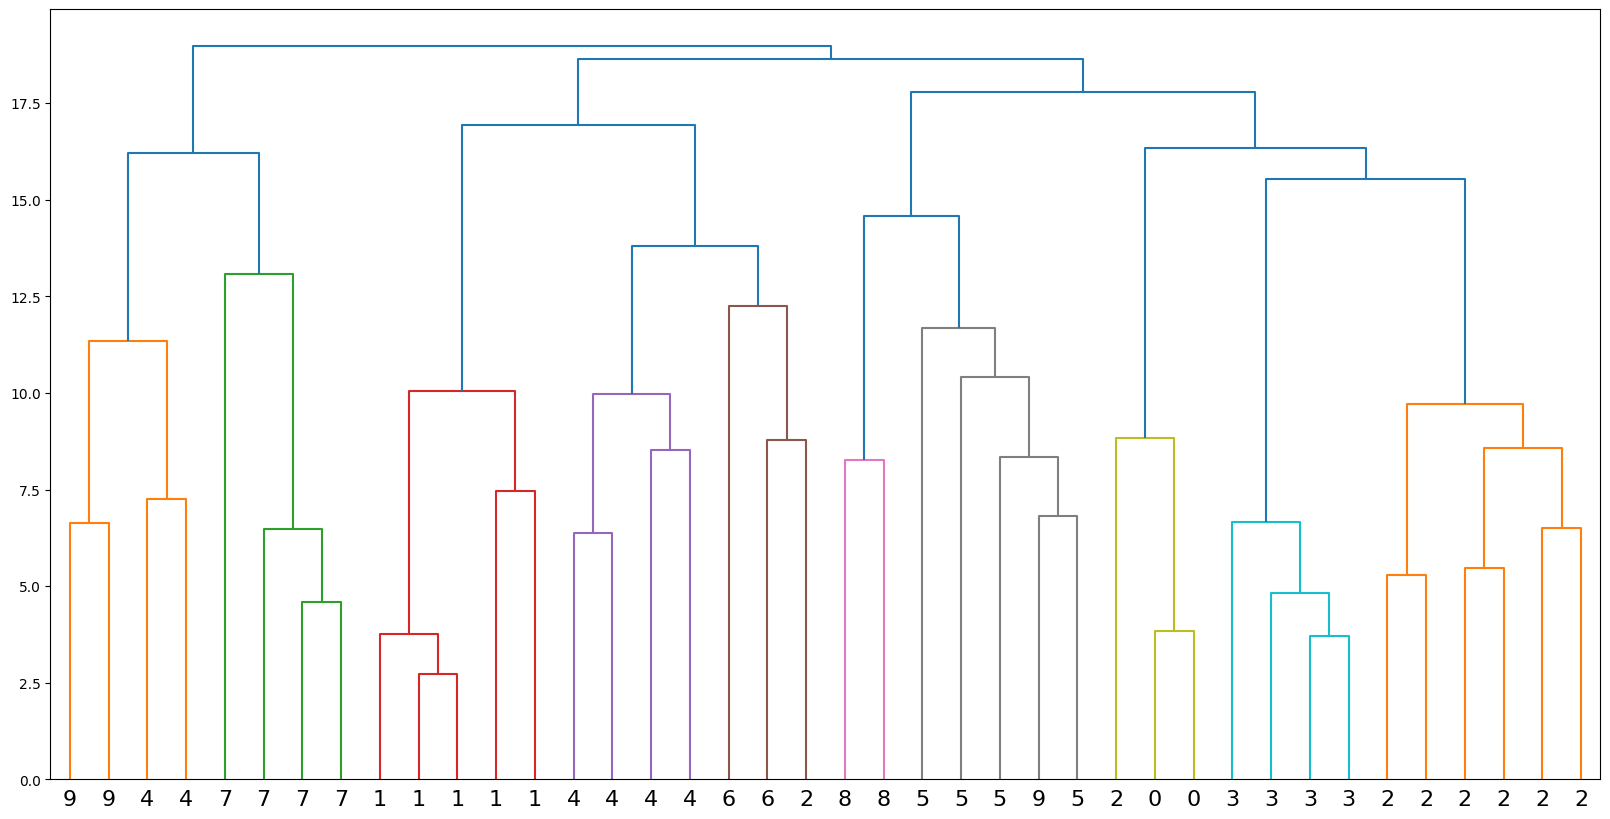

In [ ]:
# Step 13.4: Apply hierarchical clustering using complete linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
fig = plt.figure(figsize=(20,10))
mergings = linkage(data_featureVector_scaled, method = 'complete') # select a linkage, also try 'single' and 'average'
dendrogram(mergings, labels = sub_sample_labels, leaf_rotation=0, leaf_font_size=16)
plt.show()



In [ ]:
# Step 13.5: Generate clusters from the dendrogram
# Based on visual inspection, I set the height cutoff to 12
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 12, criterion = 'distance')
print(labels)

[ 4  1  3 12  2  1 11 12  8 10 10  9  4 12 11  1  6  5  2  5  9  1 12  2
  5 11  4  4  9  9  9  4 12  6  5 10 11  7  8 12]


In [ ]:
# Step 14.1  For visualization of high-dimensional data, we need to apply PCA for dimension reduction first 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
pca_data = pca.transform(X_train_scaled)

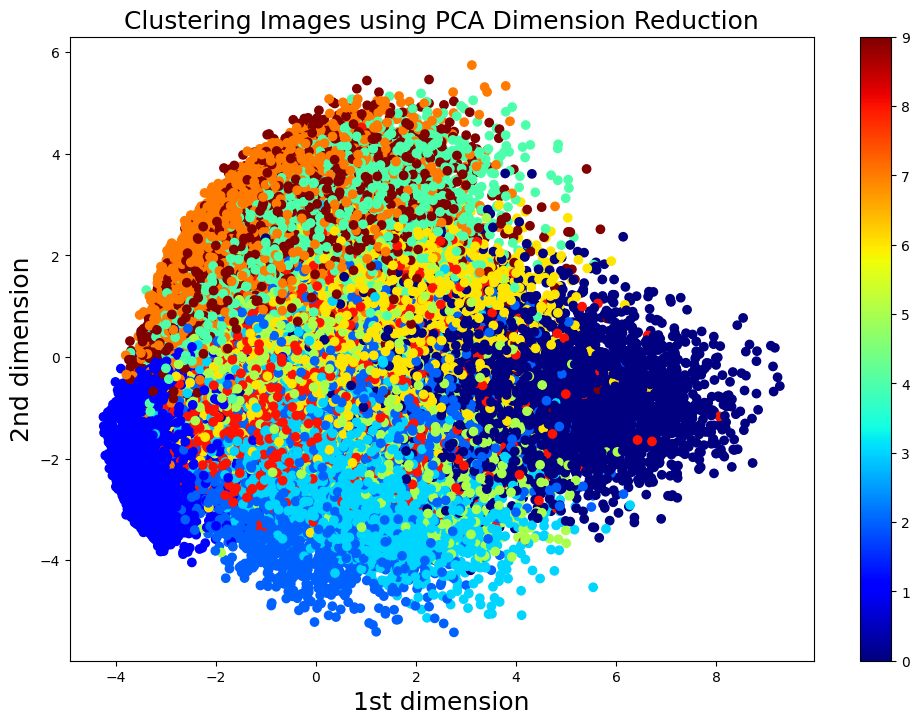

In [ ]:
# treat the first two PCs as x and y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c= y_train, cmap='jet') 
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2nd dimension", fontsize=18)
plt.title("Clustering Images using PCA Dimension Reduction", fontsize=18)
plt.colorbar()
plt.show()


<ipython-input-24-560ebbe8557f>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='jet')


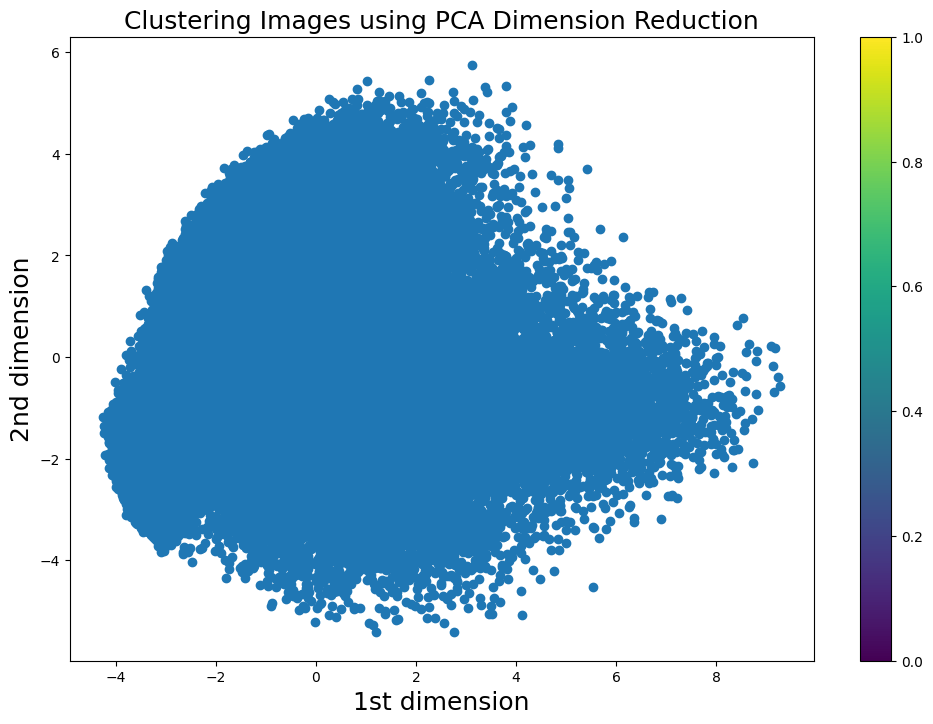

In [ ]:
# treat the first two PCs as x and y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='jet') 
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2nd dimension", fontsize=18)
plt.title("Clustering Images using PCA Dimension Reduction", fontsize=18)
plt.colorbar()
plt.show()

In [ ]:
# Step 14.1: Visualize the data using T-SNE dimension reduction
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

# Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:
subset_X_train_scaled = X_train_scaled[0:500]
subset_y_train = y_train[0:500]
X_tsne_reduced = tsne.fit_transform(subset_X_train_scaled)

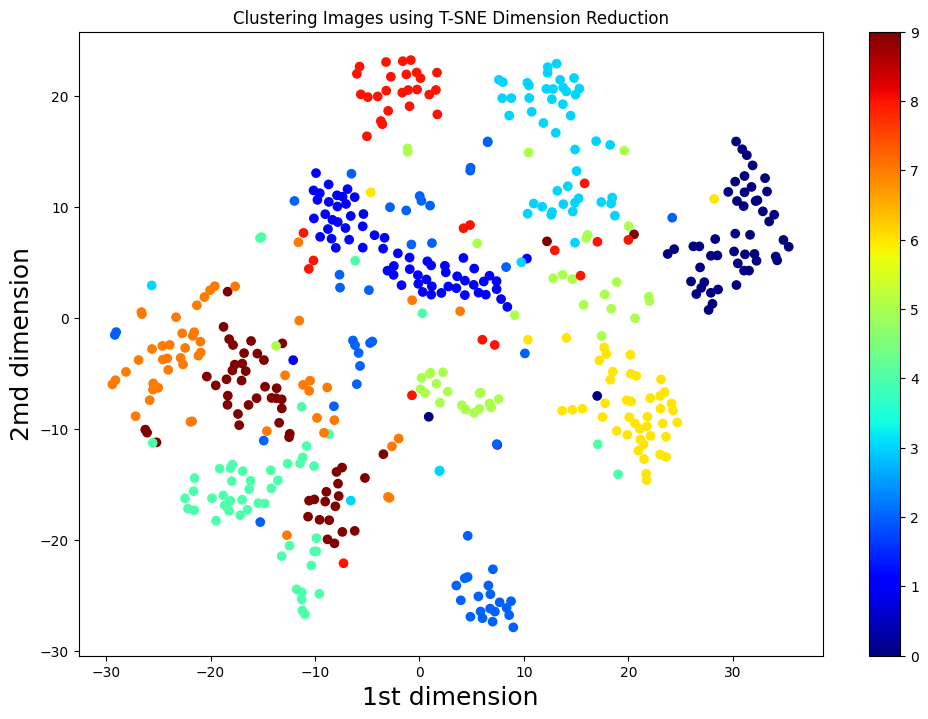

In [ ]:
# Step 14.2:  visualize the T-SNE coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c= subset_y_train, cmap='jet')  # color by real labels
plt.colorbar()
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2md dimension", fontsize=18)
plt.title("Clustering Images using T-SNE Dimension Reduction", fontsize=12)
plt.show()

In [ ]:
# Step 15.1: Apply PCA for dimension reduction on this extracted features
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_test_featureVector)
pca_data = pca.transform(X_test_featureVector)

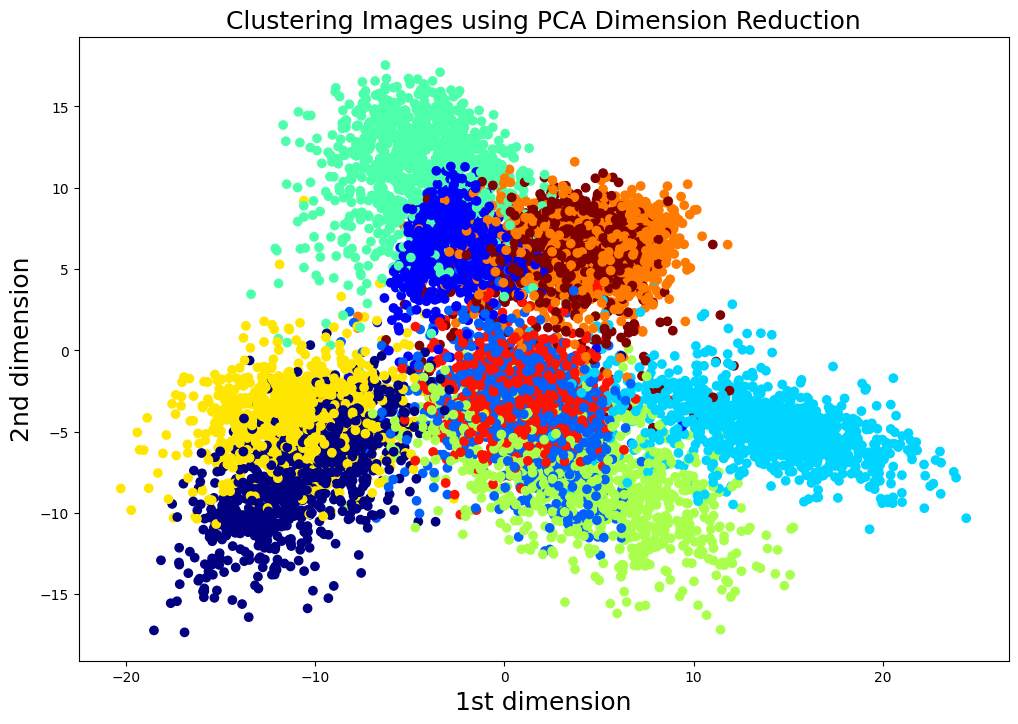

In [ ]:
## Step 15.2: visualize the PCA clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c= y_test, cmap='jet') # colored by real label
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2nd dimension", fontsize=18)
plt.title("Clustering Images using PCA Dimension Reduction", fontsize=18)
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_test_featureVector)
pca_data = pca.transform(X_test_featureVector)

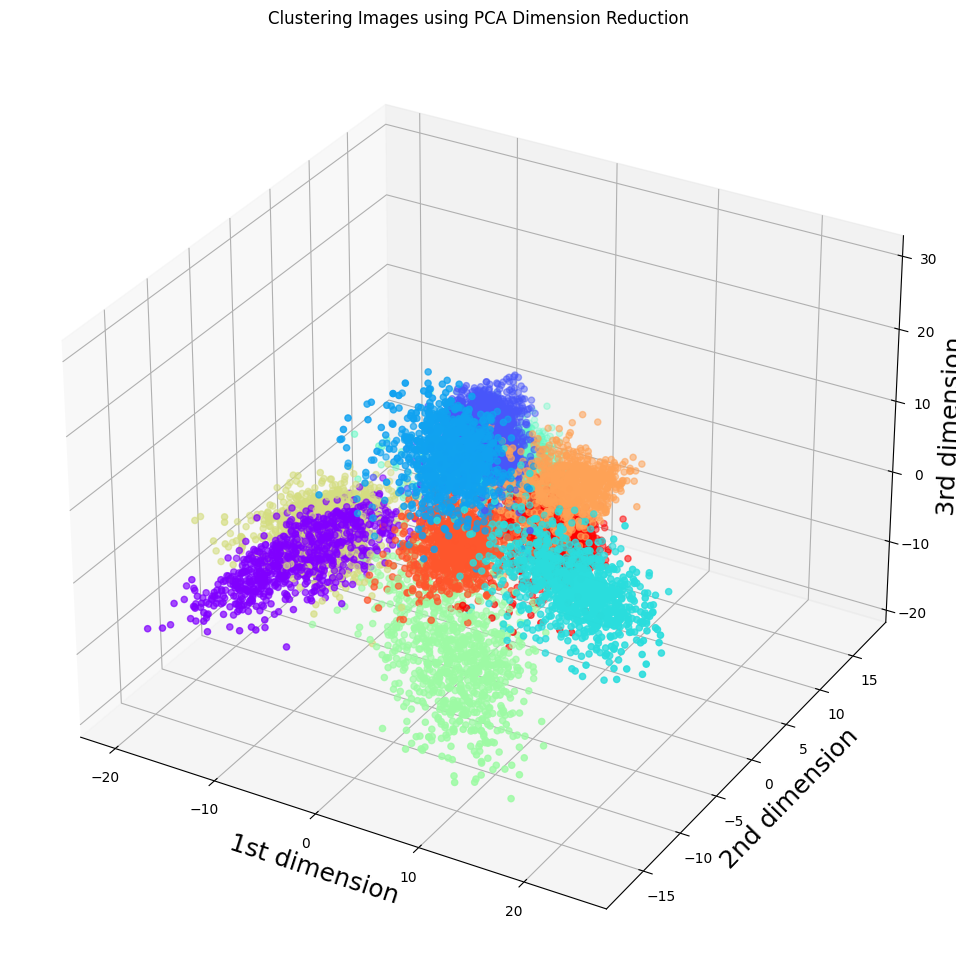

In [ ]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(bottom = 0.1)
ax = plt.axes(projection ="3d")
ax.scatter3D(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=y_test, cmap='rainbow') 

ax.set_xlabel("1st dimension", fontsize=18)
ax.set_ylabel("2nd dimension", fontsize=18)
ax.set_zlabel("3rd dimension", fontsize=18)

ax.set_title("Clustering Images using PCA Dimension Reduction", fontsize=12)
plt.show()